In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

def cleaning(df, threshold=100):
    cat_feats = ["cap-shape", "cap-surface", "cap-color", "does-bruise-or-bleed", "gill-attachment",
                 "gill-spacing", "gill-color", "stem-root", "stem-surface", "stem-color", "veil-type",
                 "veil-color", "has-ring", "ring-type", "spore-print-color", "habitat", "season"]

    for feat in cat_feats:
        # Fill missing values with 'missing'
        df[feat] = df[feat].fillna('missing')
        
        # Replace categories with low counts with 'noise'
        counts = df[feat].value_counts(dropna=False)
        low_count_cats = counts[counts < threshold].index
        if len(low_count_cats) > 0:
            df.loc[df[feat].isin(low_count_cats), feat] = "noise"
        
        # Convert column to categorical type
        df[feat] = df[feat].astype('category')
    
    return df
tra = cleaning(train)
tes = cleaning(test)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

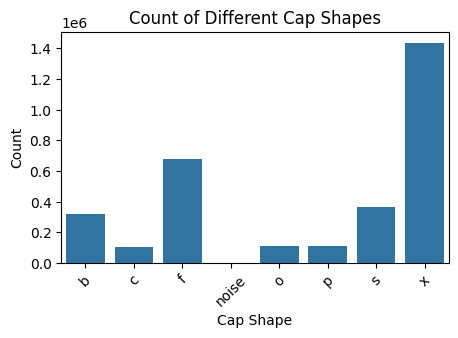

In [14]:
# Example for 'cap-shape'
plt.figure(figsize=(5,3))
sns.countplot(x='cap-shape', data=tra)
plt.title('Count of Different Cap Shapes')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

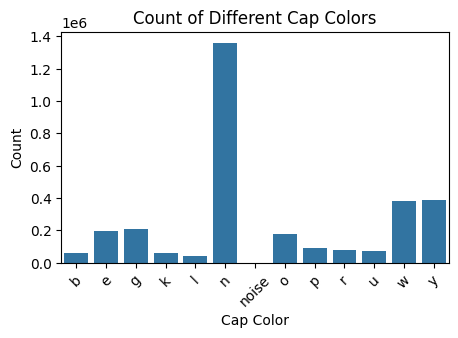

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(x='cap-color', data=tra)
plt.title('Count of Different Cap Colors')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7628\1409419955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gill-color', data=tra, palette='coolwarm')


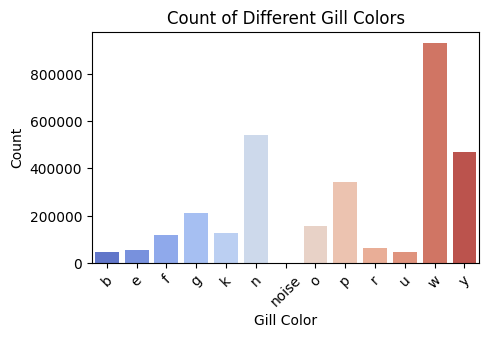

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x='gill-color', data=tra, palette='coolwarm')
plt.title('Count of Different Gill Colors')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

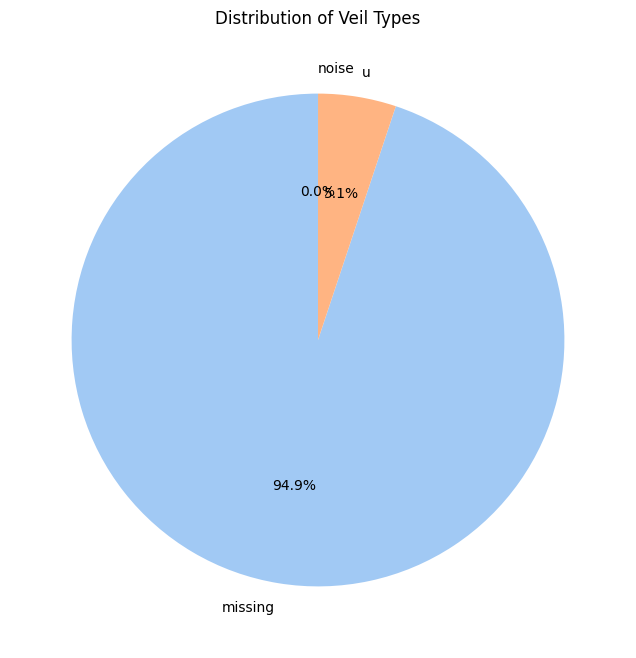

In [17]:
# Pie chart for 'veil-type'
plt.figure(figsize=(8, 8))
tra['veil-type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Veil Types')
plt.ylabel('')  # Removing the y-label for aesthetics
plt.show()



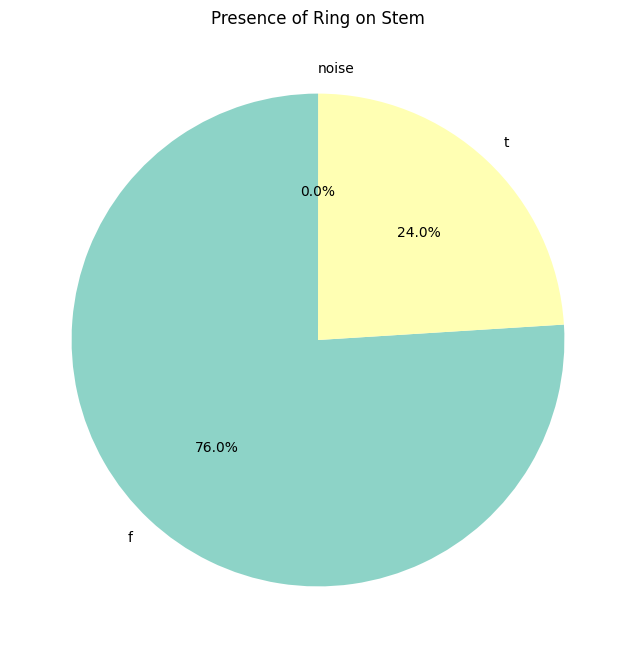

In [18]:
# Pie chart for 'has-ring'
plt.figure(figsize=(8, 8))
tra['has-ring'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Presence of Ring on Stem')
plt.ylabel('')  # Removing the y-label for aesthetics
plt.show()



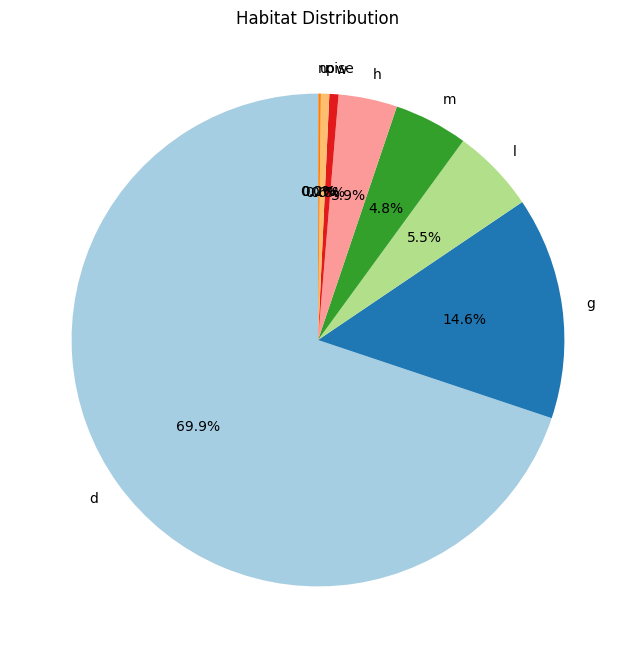

In [19]:
# Pie chart for 'habitat'
plt.figure(figsize=(8, 8))
tra['habitat'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))
plt.title('Habitat Distribution')
plt.ylabel('')  # Removing the y-label for aesthetics
plt.show()
